#Text Classification (AI or Human Written) with Word2Vec and Machine Learning Models

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


#Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re
import joblib
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Defining file paths for the training and testing datasets stored on Google Drive.


In [ ]:
train_path="/content/train_df (1).csv"
test_path ="/content/test_df (1).csv"
# coling_path="/content/train_COLING.csv"
pan_path = "/content/train.csv"

# Load  datasets


In [ ]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
# coling_df = pd.read_csv(coling_path)
pan_df = pd.read_csv(pan_path)

In [ ]:
train_df = train_df.dropna(subset=['text'])
test_df = test_df.dropna(subset=['text'])
# coling_df = coling_df.dropna(subset=['text'])
pan_df = pan_df.dropna(subset=['text'])

In [ ]:
# Drop duplicate rows in 'train_df'
train_df = train_df.drop_duplicates(subset=['text'])

# Drop duplicate rows in 'test_df'
test_df = test_df.drop_duplicates(subset=['text'])

# coling_df = coling_df.drop_duplicates(subset=['text'])
pan_df = pan_df.drop_duplicates(subset=['text'])


# Function to preprocess text into lists of words


In [ ]:
# def preprocess_text(text):
#     return text.split()

In [ ]:
train_df = train_df.sample(n=2000, random_state=42)
test_df = test_df.sample(n=700, random_state=42)
# coling_df = coling_df.sample(n=700, random_state=42)
pan_df = pan_df.sample(n=2000, random_state=42)

# Splitting the dataset into features (text) and labels (target).


In [ ]:
X_train = train_df['text']
y_train = train_df['label']
X_test = test_df['text']
y_test = test_df['label']
# X_coling = coling_df['text']
# y_coling = coling_df['label']
X_pan = pan_df['text']
y_pan = pan_df['label']

# Preprocess text data


In [ ]:
train_corpus = [text.split() for text in X_train]
test_corpus = [text.split() for text in X_test]
# coling_corpus = [text.split() for text in X_coling]
pan_corpus = [text.split() for text in X_pan]

# Train Word2Vec model


In [ ]:
w2v_model = Word2Vec(
    sentences=train_corpus,  # The input corpus, where each sentence is tokenized into a list of words.
    vector_size=100,         # The dimensionality of the word vectors (size of each word embedding).
    window=5,                # The maximum distance between the current and predicted word in a sentence (context window).
    min_count=2,             # Ignores words that appear less than 2 times in the corpus.
    workers=4,               # Number of worker threads used for training (parallelism).
    sg=0                     # Specifies the training algorithm: 0 for CBOW (Continuous Bag of Words), 1 for Skip-gram.
)

# Save the Word2Vec model

In [ ]:
# # Save the Word2Vec model
# w2v_model.save("word2vec_model.model")



# Function to convert a corpus of tokenized sentences into vectors using a pre-trained Word2Vec model.


In [ ]:
# Function to create text embeddings by averaging word vectors
def text_to_vector(corpus, model):
    vectors = []
    for words in corpus:
        word_vecs = [model.wv[word] for word in words if word in model.wv]
        if len(word_vecs) > 0:
            vectors.append(np.mean(word_vecs, axis=0))
        else:
            vectors.append(np.zeros(model.vector_size))
    return np.array(vectors)

- The function handles sentences by averaging the Word2Vec embeddings of words in each sentence.
- If a sentence contains no words present in the Word2Vec model, a zero vector is used as a placeholder.
- The output is a NumPy array where each row corresponds to the vector representation of a sentence.

# Vectorize train and test data


In [ ]:
X_train_vectors = text_to_vector(train_corpus, w2v_model)
X_test_vectors = text_to_vector(test_corpus, w2v_model)
# X_coling_vectors = text_to_vector(coling_corpus, w2v_model)
X_pan_vectors = text_to_vector(pan_corpus, w2v_model)

# Normalize feature vectors for models like SVM

In [ ]:
scaler = MinMaxScaler()
X_train_vectors = scaler.fit_transform(X_train_vectors)
X_test_vectors = scaler.transform(X_test_vectors)
# X_coling_vectors = scaler.transform(X_coling_vectors)
X_pan_vectors = scaler.transform(X_pan_vectors)

In [ ]:
# joblib.dump(scaler, 'minmax_scaler.joblib')  # Save the fitted scaler


# Initialize models


In [ ]:
xgb_model = XGBClassifier(eval_metric='logloss', random_state=47)
svm_model = SVC(probability=True)
nb_model = MultinomialNB()
rf_model = RandomForestClassifier(random_state=47)
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [ ]:
models = {
    'XGBoost': xgb_model,
    'SVM': svm_model,
    'Naive Bayes': nb_model,
    'Random Forest': rf_model,
    'GradientBoosting': gbc
}

# Train and evaluate models


Evaluation of model XGBoost
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       369
           1       0.90      0.93      0.92       331

    accuracy                           0.92       700
   macro avg       0.92      0.92      0.92       700
weighted avg       0.92      0.92      0.92       700



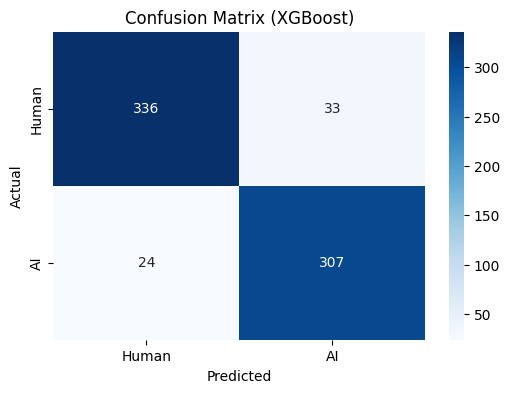

Evaluation of model SVM
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       369
           1       0.91      0.91      0.91       331

    accuracy                           0.92       700
   macro avg       0.92      0.92      0.92       700
weighted avg       0.92      0.92      0.92       700



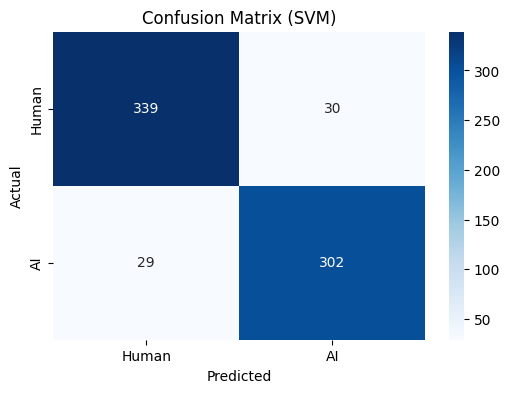

Evaluation of model Naive Bayes
              precision    recall  f1-score   support

           0       0.76      0.60      0.67       369
           1       0.64      0.79      0.71       331

    accuracy                           0.69       700
   macro avg       0.70      0.70      0.69       700
weighted avg       0.71      0.69      0.69       700



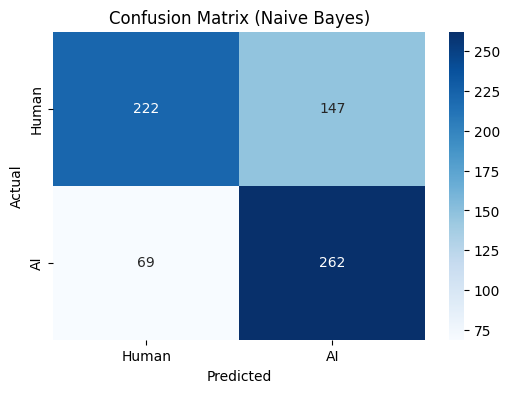

Evaluation of model Random Forest
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       369
           1       0.88      0.94      0.91       331

    accuracy                           0.91       700
   macro avg       0.91      0.91      0.91       700
weighted avg       0.91      0.91      0.91       700



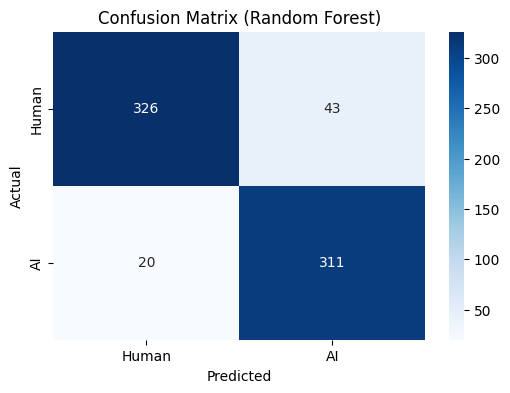

Evaluation of model GradientBoosting
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       369
           1       0.89      0.93      0.91       331

    accuracy                           0.92       700
   macro avg       0.92      0.92      0.92       700
weighted avg       0.92      0.92      0.92       700



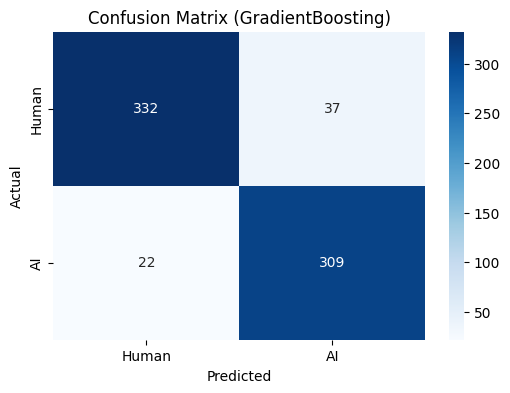

In [ ]:
for model_name, model in models.items():
    # Train model
    model.fit(X_train_vectors, y_train)

    # Predict on test data
    y_pred = model.predict(X_test_vectors)

    print(f"Evaluation of model {model_name}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)



    # Plotting the Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()

# Evaluation on Coling dataset


Evaluation of model XGBoost
              precision    recall  f1-score   support

           0       0.53      0.53      0.53       273
           1       0.70      0.69      0.69       427

    accuracy                           0.63       700
   macro avg       0.61      0.61      0.61       700
weighted avg       0.63      0.63      0.63       700



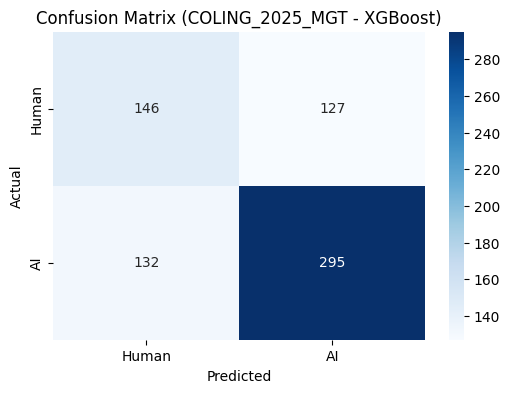

Evaluation of model SVM
              precision    recall  f1-score   support

           0       0.53      0.47      0.50       273
           1       0.68      0.73      0.71       427

    accuracy                           0.63       700
   macro avg       0.61      0.60      0.60       700
weighted avg       0.62      0.63      0.63       700



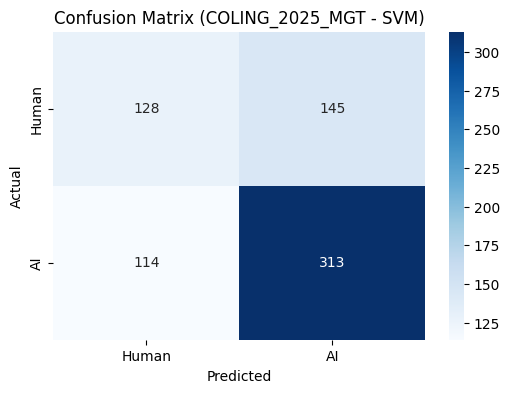

Evaluation of model Naive Bayes
              precision    recall  f1-score   support

           0       0.48      0.39      0.43       273
           1       0.65      0.73      0.69       427

    accuracy                           0.60       700
   macro avg       0.57      0.56      0.56       700
weighted avg       0.58      0.60      0.59       700



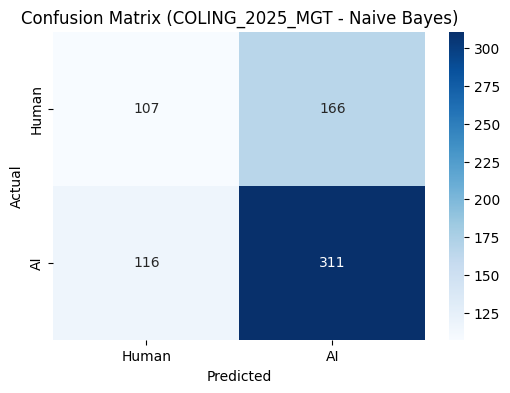

Evaluation of model Random Forest
              precision    recall  f1-score   support

           0       0.53      0.40      0.46       273
           1       0.67      0.78      0.72       427

    accuracy                           0.63       700
   macro avg       0.60      0.59      0.59       700
weighted avg       0.62      0.63      0.62       700



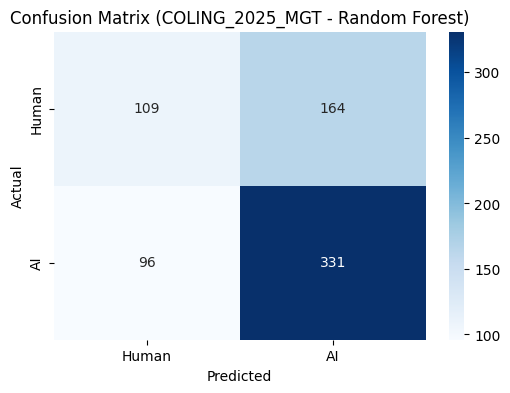

Evaluation of model GradientBoosting
              precision    recall  f1-score   support

           0       0.54      0.49      0.51       273
           1       0.69      0.73      0.71       427

    accuracy                           0.64       700
   macro avg       0.61      0.61      0.61       700
weighted avg       0.63      0.64      0.63       700



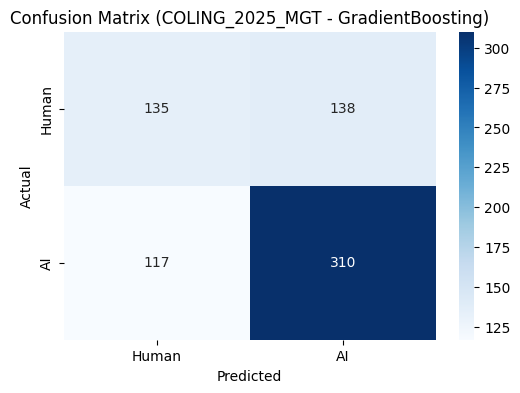

In [ ]:
for model_name, model in models.items():
    y_pred = model.predict(X_coling_vectors)

    print(f"Evaluation of model {model_name}")
    print(classification_report(y_coling, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_coling, y_pred)

    # Plotting the Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix (COLING_2025_MGT - {model_name})')
    plt.show()

Evaluation of model XGBoost
              precision    recall  f1-score   support

           0       0.54      0.74      0.62       783
           1       0.78      0.59      0.67      1217

    accuracy                           0.65      2000
   macro avg       0.66      0.66      0.65      2000
weighted avg       0.68      0.65      0.65      2000



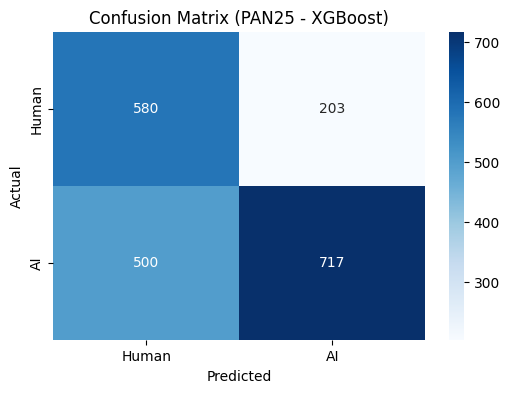

Evaluation of model SVM
              precision    recall  f1-score   support

           0       0.51      0.75      0.60       783
           1       0.77      0.53      0.63      1217

    accuracy                           0.61      2000
   macro avg       0.64      0.64      0.61      2000
weighted avg       0.66      0.61      0.62      2000



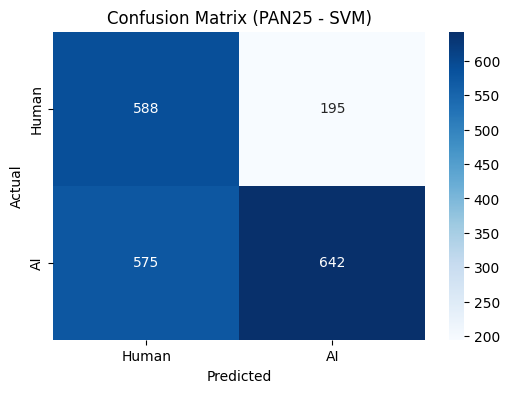

Evaluation of model Naive Bayes
              precision    recall  f1-score   support

           0       0.89      0.11      0.20       783
           1       0.63      0.99      0.77      1217

    accuracy                           0.65      2000
   macro avg       0.76      0.55      0.48      2000
weighted avg       0.73      0.65      0.55      2000



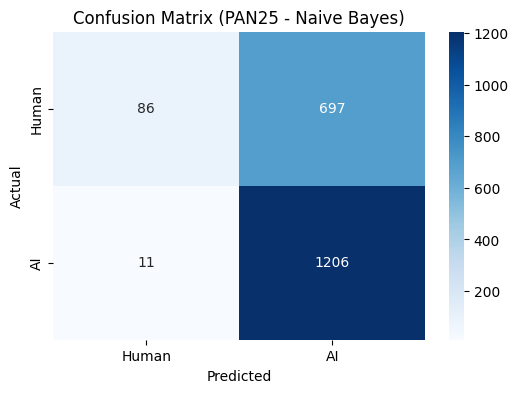

Evaluation of model Random Forest
              precision    recall  f1-score   support

           0       0.50      0.63      0.56       783
           1       0.72      0.60      0.65      1217

    accuracy                           0.61      2000
   macro avg       0.61      0.61      0.61      2000
weighted avg       0.63      0.61      0.62      2000



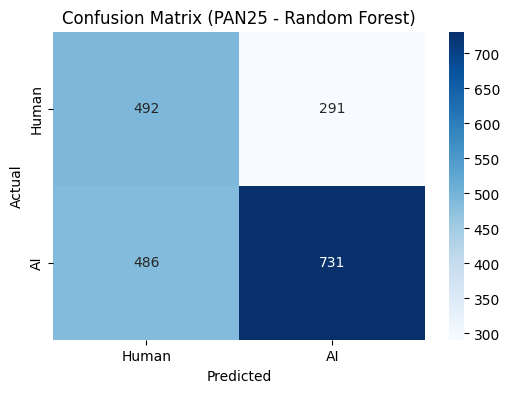

Evaluation of model GradientBoosting
              precision    recall  f1-score   support

           0       0.55      0.68      0.61       783
           1       0.76      0.64      0.69      1217

    accuracy                           0.66      2000
   macro avg       0.65      0.66      0.65      2000
weighted avg       0.68      0.66      0.66      2000



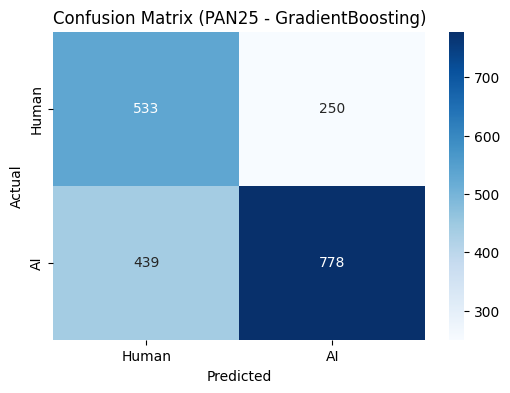

In [ ]:
for model_name, model in models.items():
    y_pred = model.predict(X_pan_vectors)

    print(f"Evaluation of model {model_name}")
    print(classification_report(y_pan, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_pan, y_pred)



    # Plotting the Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix (PAN25 - {model_name})')
    plt.show()